## Objectives

In this Poject, My Objective would be:
1. Preparing the data to be used in Machine Learning Model
2. Using Regression to train the Model so it could make Prediction
3. Do Hyperparameter Tuning to improve the model
4. Deploy the Model so it could be accessed online

## Data 

In this Machine Learning Model, I will use the dataset that could be accessed from Kaggle

Link to the dataset: https://www.kaggle.com/datasets/owm4096/laptop-prices

This data contains Prices and Specification (Brand, Processor, GPU, Screent Type, etc.) of Laptops in the current market  

# Libraries

> This section will be used to import libraries needed for this Machine Learning Model

In [43]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle


# Load the Dataset

In [2]:
# Data Loading
df_ori = pd.read_csv('laptop_prices.csv')
df = df_ori.copy()

df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [3]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

Now the dataset has been loaded. This dataset contains 1275 rows and 23 columns that includes Brand, Type, Specifications, and Prices of the laptops. For the next step, I will check the column names to check if there are any columns that I have to rename to make it easier in coding process

In [4]:
# Data Checking 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

Now we can see all the 23 column names. All of the columns already have the right datatype, but since some contains object (string) they will be encoded later. Now we'll be focusing on renaming some column names

In [5]:
# Renaming Some Columns
df.rename(columns={"TypeName":"Type","Price_euros":"Price","ScreenW":"Width","ScreenH":"Height","IPSpanel":"IPS","RetinaDisplay":"Retina"}, inplace=True)
# Showing updated dataset
df

,Company,Product,Type,Inches,Ram,OS,Weight,Price,Screen,Width,...,Retina,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


Now, this dataset has proper column name, we could continue to the next step

# Exploratory Data Analysys

> In this step we will dive deep into the data and check if we could gain some basic conclusion within the data 

## Descriptive Statistics

In [6]:
# Descriptive Statistic
df.describe()

,Inches,Ram,Weight,Price,Width,Height,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


We could see that we have no missing vales here. By looking at the mean and median, only Price, Primary Storage, and Secondary Storage that has data that doesn't distributed normally. But we have to confirm this statistically.

In [7]:
# creating numeric columns
num_cols = ['Inches', 'Ram', 'Weight', 'Price', 'Width', 'Height', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

# Check the distribution
for col in df[num_cols]:
    print(f'Skewness of {col} : {df[col].skew()}')

Skewness of Inches : -0.43862218205720077
Skewness of Ram : 2.6987160264758154
Skewness of Weight : 1.1508038740432096
Skewness of Price : 1.511146749634856
Skewness of Width : 2.210136891000519
Skewness of Height : 2.117949086993264
Skewness of CPU_freq : -0.8382457477932739
Skewness of PrimaryStorage : 1.5928661937414683
Skewness of SecondaryStorage : 2.2576425903136994


While statistically, we've proved that only `Inches` is normally distributed and `CPU_freq` is moderately skewed, while the other columns are skewed. This means that later an outlier identifying would be using Tukey's Rule and the handling would be using capping (Winsorizer)

## Price Distribution 

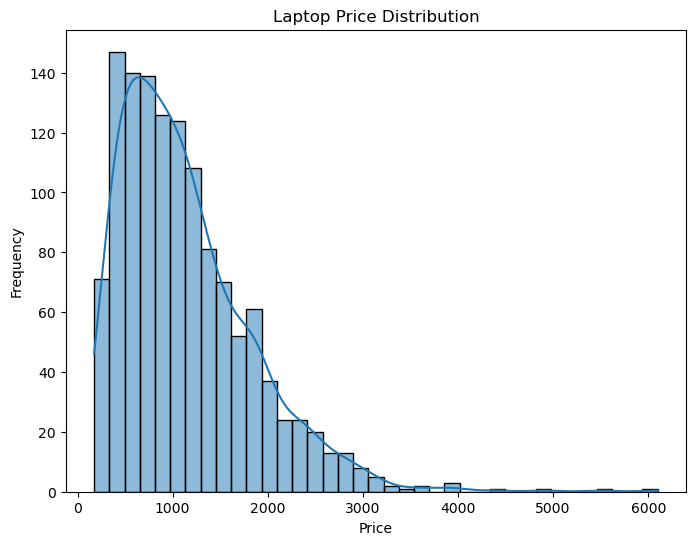

In [8]:
# Laptop Price Distributiob
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

We could see from the graph that most laptops are budget priced laptops, and as the price getting raised, the amount of products lowered. This means that the most promising laptops are still in budget category, that's why only few products were tagged in higher prices.

### Price Distribution by Brand

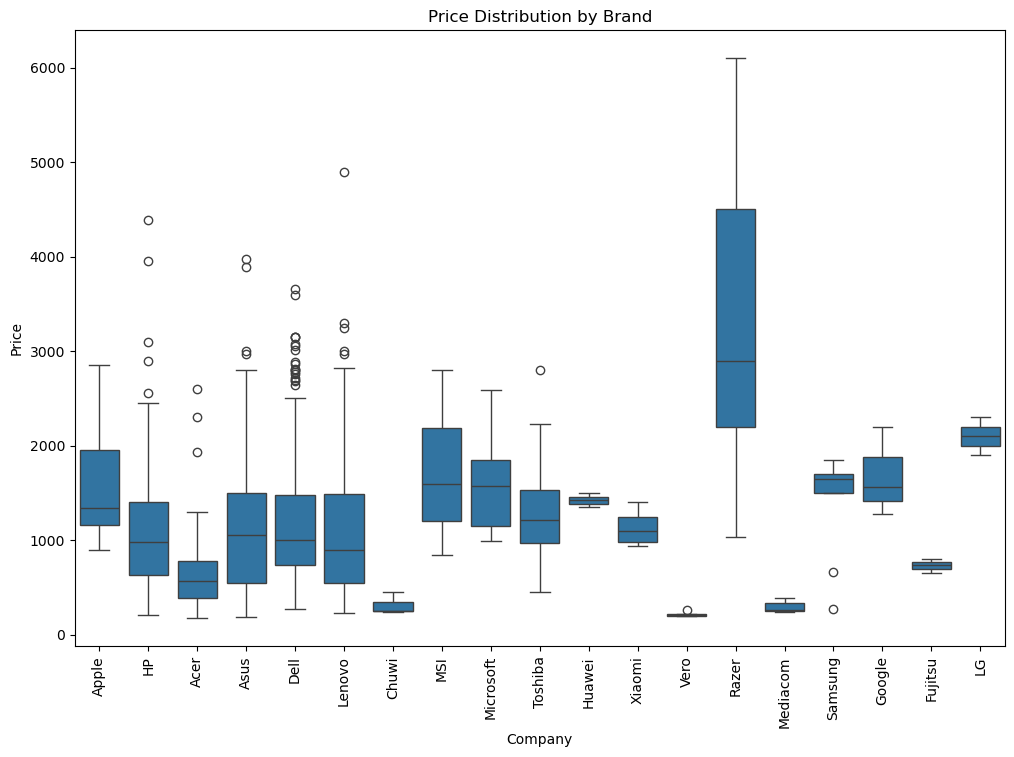

,Company,Price
0,Razer,3346.142857
1,LG,2099.000000
2,MSI,1728.908148
3,Google,1677.666667
4,Microsoft,1612.308333
5,Apple,1564.198571
6,Huawei,1424.000000
7,Samsung,1413.444444
8,Toshiba,1267.812500
9,Dell,1199.225120


In [9]:
# Pirce By Brand
brand_avg_price = df.groupby('Company')['Price'].mean().sort_values(ascending=False).reset_index()

# Boxplot average price by brand
plt.figure(figsize=(12,8))
sns.boxplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

# Display the table of average price by brand
brand_avg_price

From the graph and the table above, we could see that: 
1. **Razer** has the highest average price of 3346 euros, this brand is well known as high-performance gaming laptops so this is to be expected.
2. **LG**, **MSI**, **Google**, and **Microsoft** tailing with also high average price. I was surprised to see LG on the higher position since their laptops are not really well known. While **MSI,** **Google**, and **Microsoft** are known to offer high peformance and premium laptops.
3. By the graph, **Dell** and **Lenovo** has the most variety of Laptop Prices to offer, seen by their high numbers of outliers.
4. **Vero** has the lowest average price of only 217 euros

### Price Distribution by Type

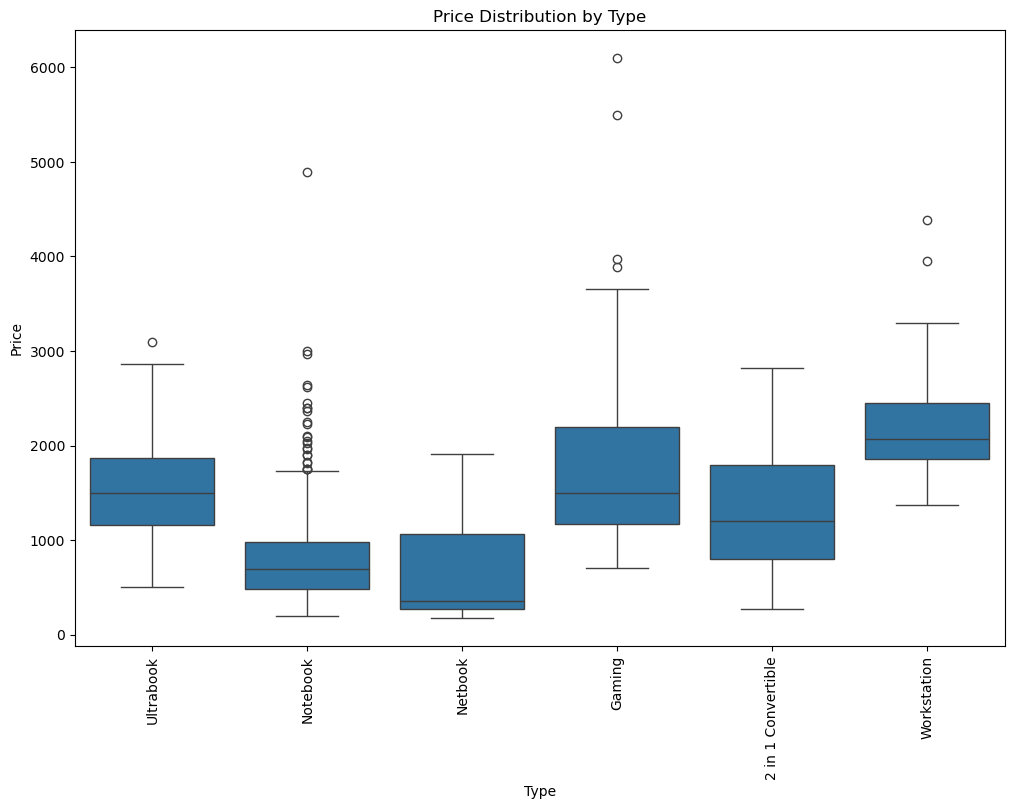

,Type,Price
0,Workstation,2280.358966
1,Gaming,1731.380634
2,Ultrabook,1556.676031
3,2 in 1 Convertible,1289.714530
4,Notebook,788.744781
5,Netbook,673.382609


In [10]:
# Pirce By Type
type_avg_price = df.groupby('Type')['Price'].mean(round(2)).sort_values(ascending=False).reset_index()

# Boxplot average price by type
plt.figure(figsize=(12,8))
sns.boxplot(x='Type', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Type')
plt.show()

# Display the table of average price by brand
type_avg_price

**Workstation**, a Laptop with high-end performance has the highest average Price, and **Netbook** which usually has low-end performance (mainly marketed as laptop for browsing the internet) has the lowest average price. Hence, `Type` could be considered as Ordinal Category, Since it's clear we can rank the average price by it's `Type` 

## Correlation

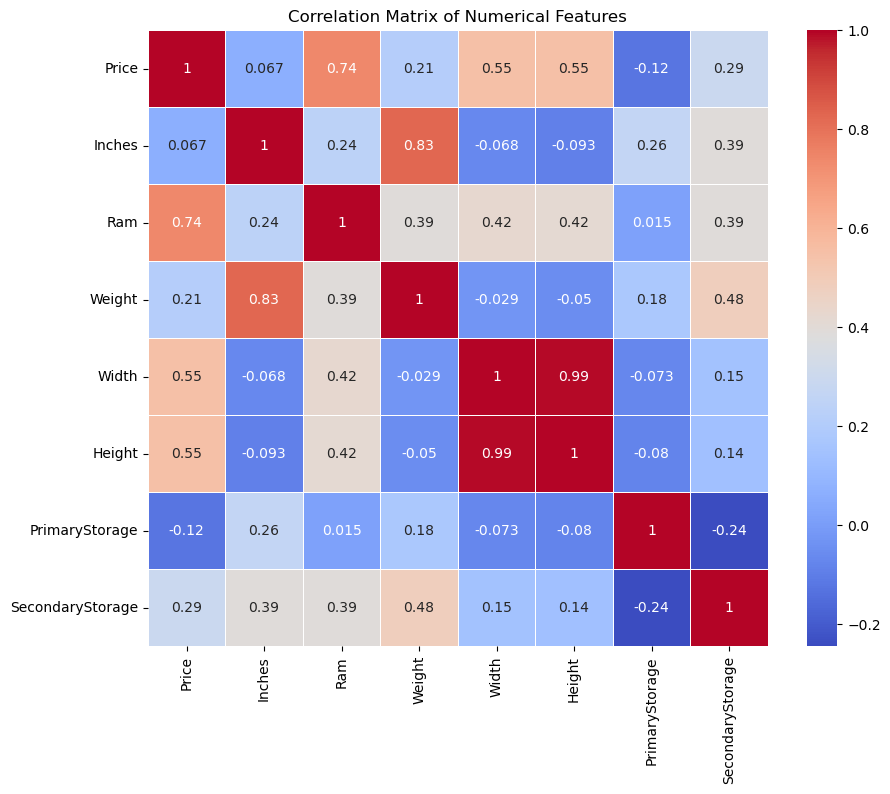

In [11]:
# Correlation Matrix
corr_matrix = df[['Price', 'Inches', 'Ram', 'Weight', 'Width', 'Height', 'PrimaryStorage', 'SecondaryStorage']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

By seeing this Correlation Matrix we could gain some information:
- `Height` and `Width` correlates highly, this is because the laptop aspect ratio is commonly 16:9 or 16:10. One of this column will be dropped
- `Weight` and `Inches` also correlates highly. But since `Weight` correlates higher with `Price` than `Inches` I will drop `Inches` later

In [12]:
# Multicollinearity Checking
def calc_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

calc_vif(df[num_cols])

,variables,VIF
0,Inches,71.843694
1,Ram,9.985502
2,Weight,27.687991
3,Price,10.923759
4,Width,1406.868435
5,Height,1354.298708
6,CPU_freq,29.580731
7,PrimaryStorage,3.142141
8,SecondaryStorage,1.876435


From the multicollinearity tables, we could see that `Widht`, and `Height` have extremely high multicollinearity, Inches also have high multicollinearity, this will be not good for machine learning. Now we try to simulate if `Height` and `Inches` dropped. 

In [13]:
# Multicollinearity checking 2
calc_vif(df[num_cols].drop(columns={'Height','Inches','Price'}))

,variables,VIF
0,Ram,5.661762
1,Weight,14.000911
2,Width,12.926756
3,CPU_freq,19.104130
4,PrimaryStorage,2.998529
5,SecondaryStorage,1.820980


Some variables are still high in multicollinearity, but it's better because `Width` has decreased to 14.05 

# Feature Engineering

> This Section will be used to preprocess the data to make it suitable to train the model

## Feature Selection 1

In this step since we've analyze the correlation between columns and it's multicollinearity value, I decide to drop two columns. Now we will check the unique value in every column, but let's focus on categorical columns

In [14]:
# Creating Categorical Column List
cat_cols = df.select_dtypes(include='object').columns
# Printing unique value counts
for col in df[cat_cols]:
    print(f'The number of unique values of {col}: {df[col].nunique()}')

The number of unique values of Company: 19
The number of unique values of Product: 618
The number of unique values of Type: 6
The number of unique values of OS: 9
The number of unique values of Screen: 4
The number of unique values of Touchscreen: 2
The number of unique values of IPS: 2
The number of unique values of Retina: 2
The number of unique values of CPU_company: 3
The number of unique values of CPU_model: 93
The number of unique values of PrimaryStorageType: 4
The number of unique values of SecondaryStorageType: 4
The number of unique values of GPU_company: 4
The number of unique values of GPU_model: 110


I also will drop `Product`, `CPU_model`, and `GPU_model` to reduce the data cardinality, since those three are have the most unique values and they could be represented by the Company

In [15]:
# Dropping the unused features
dfs = df.drop(columns={'Product','Height','Inches', 'GPU_model', 'CPU_model'})
dfs

,Company,Type,Ram,OS,Weight,Price,Screen,Width,Touchscreen,IPS,Retina,CPU_company,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company
0,Apple,Ultrabook,8,macOS,1.37,1339.69,Standard,2560,No,Yes,Yes,Intel,2.3,128,0,SSD,No,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,Standard,1440,No,No,No,Intel,1.8,128,0,Flash Storage,No,Intel
2,HP,Notebook,8,No OS,1.86,575.00,Full HD,1920,No,No,No,Intel,2.5,256,0,SSD,No,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,Standard,2880,No,Yes,Yes,Intel,2.7,512,0,SSD,No,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,Standard,2560,No,Yes,Yes,Intel,3.1,256,0,SSD,No,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,638.00,Full HD,1920,Yes,Yes,No,Intel,2.5,128,0,SSD,No,Intel
1271,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,1499.00,Quad HD+,3200,Yes,Yes,No,Intel,2.5,512,0,SSD,No,Intel
1272,Lenovo,Notebook,2,Windows 10,1.50,229.00,Standard,1366,No,No,No,Intel,1.6,64,0,Flash Storage,No,Intel
1273,HP,Notebook,6,Windows 10,2.19,764.00,Standard,1366,No,No,No,Intel,2.5,1024,0,HDD,No,AMD


In [16]:
dfs.columns

Index(['Company', 'Type', 'Ram', 'OS', 'Weight', 'Price', 'Screen', 'Width',
       'Touchscreen', 'IPS', 'Retina', 'CPU_company', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company'],
      dtype='object')

Now our dataset only consists of 18 Columns and more suitable for training our Machine Learning Model

## Data Splitting

> In order to build the Machine Learning Model, we need to train and test the data. In this step, we will split the dataset

In [17]:
# X and y data splitting
X = dfs.drop(columns='Price')
y = dfs.Price

# Train and Test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state=27)

print(f'X train size : {X_train.shape}')
print(f'X test size : {X_test.shape}')
print(f'y train size : {y_train.shape}')
print(f'y test size : {y_test.shape}')

X train size : (1020, 17)
X test size : (255, 17)
y train size : (1020,)
y test size : (255,)


Now the data has been splitted to X_train, X_test, y_train and y_test, we can continue to split the data to Categorical and Numerical data. Also the categorical data would be split to OHE (OneHotEncoder) and ORD(OrdinalEncoder: `Type`)

In [18]:
# Categorical and Numerical data splitting
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
ohe_cols = X.select_dtypes(include='object').columns.drop('Type')
ord_cols = X.select_dtypes(include='object').columns.drop(['Company', 'OS', 'Screen', 'Touchscreen', 'IPS', 'Retina','CPU_company', 'PrimaryStorageType', 'SecondaryStorageType','GPU_company'])


In [19]:
# Further Splitting the X_train and X_test
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]
X_train_ohe = X_train[ohe_cols]
X_test_ohe = X_test[ohe_cols]
X_train_ord = X_train[ord_cols]
X_test_ord = X_test[ord_cols]

## Numerical Data Handling

### Outlier Handling


In [20]:
# Skewness Checking
l= []

for col in dfs[num_cols].columns:
  l.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skew_tab = pd.DataFrame(columns=['Column', 'Skewness', 'Distribution'], data= l)
skew_tab

,Column,Skewness,Distribution
0,Ram,2.7,skewed
1,Weight,1.2,skewed
2,Width,2.2,skewed
3,CPU_freq,-0.8,skewed
4,PrimaryStorage,1.6,skewed
5,SecondaryStorage,2.3,skewed


In [21]:
# Finding Percentage of Outlier
col = []
lower_boundary = []
upper_boundary = []
outlier_percentage = []

for row in range (0, len(skew_tab)):
    cols = skew_tab['Column'][row]
    IQR = dfs[cols].quantile(0.75) - dfs[cols].quantile(0.25)
    low_bound = dfs[cols].quantile(0.25) - (IQR * 1.5)
    up_bound = dfs[cols].quantile(0.75) + (IQR * 1.5)
    total_outlier = ((len(dfs[dfs[cols] > up_bound]) / len(dfs) * 100) + (len(dfs[dfs[cols] < low_bound]) / len(dfs) * 100))
    col.append(cols)
    lower_boundary.append(low_bound)
    upper_boundary.append(up_bound)
    outlier_percentage.append(total_outlier)

Outliers = pd.DataFrame(
    {'Column':col,
     'upper_boundary': [round(upper_boundary,2) for upper_boundary in upper_boundary],
     'lower_boundary': [round(lower_boundary,2) for lower_boundary in lower_boundary],
     'percentage_total_outlier': [round(outlier_percentage,2) for outlier_percentage in outlier_percentage]})

Outliers

,Column,upper_boundary,lower_boundary,percentage_total_outlier
0,Ram,14.00,-2.00,17.18
1,Weight,3.53,0.28,3.53
2,Width,1920.00,1920.00,34.27
3,CPU_freq,3.75,0.95,0.16
4,PrimaryStorage,896.00,-128.00,20.08
5,SecondaryStorage,0.00,0.00,16.31


As we can see, that Weight and CPU_Freq are low on outliers so we would ignore them and focus on the rest

In [22]:
# Create a variable list
outlied = ['Ram', 'Width', 'PrimaryStorage', 'SecondaryStorage']

# Winsorizer
winsoriser = Winsorizer(capping_method='quantiles',
                             tail='both',
                             fold=0.05,
                             variables=outlied,
                             missing_values='ignore')

X_train_num_capped = winsoriser.fit_transform(X_train_num)
X_test_num_capped = winsoriser.transform(X_test_num)


### Scaling

> In this case MinMaxScaler is used since the data variates with scales (some in inch, some in cm, some in kg)

In [23]:
# Scaling Method
scaler = MinMaxScaler()

# Scaler Fit
scaler.fit(X_train_num_capped)
# Applying Scaler
X_train_num_capped_scaled = pd.DataFrame(scaler.transform(X_train_num_capped),columns=num_cols)
X_test_num_capped_scaled = pd.DataFrame(scaler.transform(X_test_num_capped),columns=num_cols)

## Categorical Data Handling

### One Hot Encoder

> Most of the data has labels or category that weren't ordinal, which means we will use one hot encoder

In [24]:
# Encoding Method
ohe_encoder = OneHotEncoder(sparse_output=False)

# encoder fitting
ohe_encoder.fit(X_train_ohe)
#  Encoder transform
X_train_ohe_encoded = pd.DataFrame(ohe_encoder.transform(X_train_ohe), columns=ohe_encoder.get_feature_names_out())
X_test_ohe_encoded = pd.DataFrame(ohe_encoder.transform(X_test_ohe), columns=ohe_encoder.get_feature_names_out())

### Ordinal Encoder

In [25]:
# Encoding Method
ord_encoder = OrdinalEncoder(categories=[['Netbook', 'Notebook', '2 in 1 Convertible', 'Ultrabook', 'Gaming', 'Workstation']])

# Encoder fitting
ord_encoder.fit(X_train_ord)
# Encoder Transform
X_train_ord_encoded = pd.DataFrame(ord_encoder.transform(X_train_ord), columns=ord_cols)
X_test_ord_encoded =  pd.DataFrame(ord_encoder.transform(X_test_ord), columns=ord_cols)

## Concatenate

In [26]:
# Turning np.array back to Dataframe
X_train_num_new = pd.DataFrame(X_train_num_capped_scaled, columns=num_cols)
X_train_ord_new = pd.DataFrame(X_train_ord_encoded, columns=ord_cols)
X_test_num_new = pd.DataFrame(X_test_num_capped_scaled, columns=num_cols)
X_test_ord_new = pd.DataFrame(X_test_ord_encoded, columns=ord_cols)

# X_train Index Reset
X_train_num_new = X_train_num_new.reset_index(drop=True)
X_train_ohe_new = X_train_ohe_encoded.reset_index(drop=True)
X_train_ord_new = X_train_ord_new.reset_index(drop=True)
# X_train Concatenate
X_train_final = pd.concat([X_train_num_new,X_train_ohe_new,X_train_ord_new], axis=1)

# X_test Index Reset
X_test_num_new = X_test_num_new.reset_index(drop=True)
X_test_ohe_new = X_test_ohe_encoded.reset_index(drop=True)
X_test_ord_new = X_test_ord_new.reset_index(drop=True)
# X_test Concatenate
X_test_final = pd.concat([X_test_num_new,X_test_ohe_new,X_test_ord_new], axis=1)

## Pipeline

In [27]:
preproc = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('winsorizer', Winsorizer(capping_method='quantiles', tail='both', fold=0.05)), #Capping outliers
            ('scaler', MinMaxScaler()) #Scaling
        ]), num_cols),

        ('ohe', Pipeline(steps=[
            ('ohe_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) #OneHotEncoding
        ]), ohe_cols),

        ('ord', Pipeline(steps=[
            ('ord_encoder', OrdinalEncoder(categories=[['Netbook', 'Notebook', '2 in 1 Convertible', 'Ultrabook', 'Gaming', 'Workstation']], handle_unknown='use_encoded_value', unknown_value=-1)) #Ordinal Encoder
        ]), ord_cols)
    ]
)

In [28]:
preproc.fit(X_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='quantiles',
                                                             fold=0.05,
                                                             tail='both')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                ('ohe',
                                 Pipeline(steps=[('ohe_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False)...
                                 Index(['Company', 'OS', 'Screen', 'Touchscreen', 'IPS', 'Retina',
       'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company'],
      dtype='object')),
                                ('ord',
                                 Pipeline(steps=[('ord_encoder',
                                                  OrdinalEncoder(categories=[['Netbook',
                                                                              'Notebook',
                                                                              '2 '
                                                                              'in '
                                                                              '1 '
                                                                              'Convertible',
                                                                              'Ultrabook',
                                                                              'Gaming',
                                                                              'Workstation']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['Type'], dtype='object'))])

# Model Definition and Training 1

> In this step, I will try 4 Popular Models (KNN, SVM, Decision Tree, Random Forest) and we'll find out which model is the best to predict this dataset

## K Nearest Neighbors

In [29]:
# KNN Model in Pipeline
knn_pipe = Pipeline(steps=[
    ('preprocessor', preproc), 
    ('model', KNeighborsRegressor())])

knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_encoder',
                                                                   OneHotEncoder(handle_unkno...
       'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['Netbook',
                                                                                               'Notebook',
                                                                                               '2 '
                                                                                               'in '
                                                                                               '1 '
                                                                                               'Convertible',
                                                                                               'Ultrabook',
                                                                                               'Gaming',
                                                                                               'Workstation']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['Type'], dtype='object'))])),
                ('model', KNeighborsRegressor())])

## Suppport Vector Machinne

In [30]:
svm_pipe = Pipeline(steps=[
    ('preprocessor', preproc), 
    ('model', SVR(kernel='rbf'))])

svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_encoder',
                                                                   OneHotEncoder(handle_unkno...
                                                  Index(['Company', 'OS', 'Screen', 'Touchscreen', 'IPS', 'Retina',
       'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['Netbook',
                                                                                               'Notebook',
                                                                                               '2 '
                                                                                               'in '
                                                                                               '1 '
                                                                                               'Convertible',
                                                                                               'Ultrabook',
                                                                                               'Gaming',
                                                                                               'Workstation']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['Type'], dtype='object'))])),
                ('model', SVR())])

## Decision Tree

In [31]:
dt_pipe = Pipeline(steps=[
    ('preprocessor', preproc), 
    ('model', DecisionTreeRegressor(random_state=27))])

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_encoder',
                                                                   OneHotEncoder(handle_unkno...
       'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['Netbook',
                                                                                               'Notebook',
                                                                                               '2 '
                                                                                               'in '
                                                                                               '1 '
                                                                                               'Convertible',
                                                                                               'Ultrabook',
                                                                                               'Gaming',
                                                                                               'Workstation']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['Type'], dtype='object'))])),
                ('model', DecisionTreeRegressor(random_state=27))])

## Random Forest

In [32]:
rf_pipe = Pipeline(steps=[
    ('preprocessor', preproc), 
    ('model', RandomForestRegressor(random_state=27))])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_encoder',
                                                                   OneHotEncoder(handle_unkno...
       'CPU_company', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company'],
      dtype='object')),
                                                 ('ord',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['Netbook',
                                                                                               'Notebook',
                                                                                               '2 '
                                                                                               'in '
                                                                                               '1 '
                                                                                               'Convertible',
                                                                                               'Ultrabook',
                                                                                               'Gaming',
                                                                                               'Workstation']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['Type'], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=27))])

## Boosting

In [33]:
#XGBoost Pipeline
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preproc), 
    ('model', XGBRegressor(random_state=27))])

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='quantiles',
                                                                              fold=0.05,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_encoder',
                                                                   OneHotEncoder(handle_unkno...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=27, ...))])

# Model Evaluation 1

## K Nearest Neighbor

In [34]:
# Model Prediction
y_pred_knn = knn_pipe.predict(X_test)

# Model Evaluation
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2 = r2_score(y_test, y_pred_knn)

# Showing Evaluation Result
print (f'KNN Mean Absolute Error : {knn_mae:.2f}')
print (f'KNN Root Mean Square Error : {knn_rmse:.2f}')
print (f'KNN R2 Score: {knn_r2:.2f}\n')

# Cross-Validation
knn_cv = cross_val_score(KNeighborsRegressor(), X_train_final, y_train, cv=5, scoring='r2')
print (f'KNN Cross Validation - MEAN : {knn_cv.mean()}')
print (f'KNN Cross Validation - STD : {knn_cv.std()}')

KNN Mean Absolute Error : 252.24
KNN Root Mean Square Error : 370.22
KNN R2 Score: 0.72

KNN Cross Validation - MEAN : 0.6312027309187881
KNN Cross Validation - STD : 0.05666791522279672


## Support Vector Machine

In [35]:
# Model Prediction
y_pred_svm = svm_pipe.predict(X_test)

# Model Evaluation
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
svm_r2 = r2_score(y_test, y_pred_svm)

# Showing Evaluation Result
print (f'svm Mean Absolute Error : {svm_mae:.2f}')
print (f'svm Root Mean Square Error : {svm_rmse:.2f}')
print (f'svm R2 Score: {svm_r2:.2f}\n')

# Cross-Validation
SVM_cv = cross_val_score(SVR(kernel='rbf'), X_train_final, y_train, cv=5, scoring='r2')
print (f'SVM Cross Validation - ALL : {SVM_cv}')
print (f'SVM Cross Validation - MEAN : {SVM_cv.mean()}')
print (f'SVM Cross Validation - STD : {SVM_cv.std()}')

svm Mean Absolute Error : 481.65
svm Root Mean Square Error : 669.17
svm R2 Score: 0.08

SVM Cross Validation - ALL : [0.01473373 0.082205   0.05893987 0.07629276 0.01096988]
SVM Cross Validation - MEAN : 0.04862824877248935
SVM Cross Validation - STD : 0.03021934320083673


## Decision Tree

In [36]:
# Model Prediction
y_pred_dt = dt_pipe.predict(X_test)

# Model Evaluation
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)


# Showing Evaluation Result
print (f'dt Mean Absolute Error : {dt_mae:.2f}')
print (f'dt Root Mean Square Error : {dt_rmse:.2f}')
print (f'dt R2 Score: {dt_r2:.2f}\n')

# Cross-Validation
DT_cv = cross_val_score(DecisionTreeRegressor(random_state=27), X_train_final, y_train, cv=5, scoring='r2')
print (f'DT Cross Validation - ALL : {DT_cv}')
print (f'DT Cross Validation - MEAN : {DT_cv.mean()}')
print (f'DT Cross Validation - STD : {DT_cv.std()}')

dt Mean Absolute Error : 235.88
dt Root Mean Square Error : 392.79
dt R2 Score: 0.68

DT Cross Validation - ALL : [0.53366778 0.81590805 0.4699331  0.74359322 0.62385678]
DT Cross Validation - MEAN : 0.6373917872642914
DT Cross Validation - STD : 0.12816479732023442


## Random Forest

In [37]:
# Model Prediction
y_pred_rf = rf_pipe.predict(X_test)

# Model Evaluation
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

# Showing Evaluation Result
print (f'rf Mean Absolute Error : {rf_mae:.2f}')
print (f'rf Root Mean Square Error : {rf_rmse:.2f}')
print (f'rf R2 Score: {rf_r2:.2f}\n')

# Cross-Validation
RF_cv = cross_val_score(RandomForestRegressor(random_state=27), X_train_final, y_train, cv=5, scoring='r2')
print (f'RF Cross Validation - ALL : {RF_cv}')
print (f'RF Cross Validation - MEAN : {RF_cv.mean()}')
print (f'RF Cross Validation - STD : {RF_cv.std()}')

rf Mean Absolute Error : 194.83
rf Root Mean Square Error : 316.33
rf R2 Score: 0.79

RF Cross Validation - ALL : [0.81491101 0.85357962 0.75084317 0.82754836 0.7611894 ]
RF Cross Validation - MEAN : 0.8016143112624867
RF Cross Validation - STD : 0.03939962781487849


## Boosting

In [38]:
# Model Prediction
y_pred_xgb = xgb_pipe.predict(X_test)

# Model Evaluation
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Showing Evaluation Result
print (f'xgb Mean Absolute Error : {xgb_mae:.2f}')
print (f'xgb Root Mean Square Error : {xgb_rmse:.2f}')
print (f'xgb R2 Score: {xgb_r2:.2f}\n')

# Cross-Validation
XGB_cv = cross_val_score(XGBRegressor(random_state=27), X_train_final, y_train, cv=5, scoring='r2')
print (f'XGB Cross Validation - ALL : {XGB_cv}')
print (f'XGB Cross Validation - MEAN : {XGB_cv.mean()}')
print (f'XGB Cross Validation - STD : {XGB_cv.std()}')

xgb Mean Absolute Error : 200.72
xgb Root Mean Square Error : 301.91
xgb R2 Score: 0.81

XGB Cross Validation - ALL : [0.83510863 0.85685655 0.75346157 0.81464072 0.75377181]
XGB Cross Validation - MEAN : 0.8027678556834962
XGB Cross Validation - STD : 0.04229467946226694


## Model Evaluation Conclusion

| Model | MAE | RMSE | R2 | CV- Mean | CV-STD|
|-------|-----|------|----|----------|-------|
|KNN|252.24|370.22|0.72|0.63|0.05
|SVM|481.65|669.17|0.08|0.04|0.03
|DT|235.88|392.79|0.68|0.63|0.13
|RF|194.83|316.33|0.79|0.80|0.04
|XGB|200.72|301.91|0.81|0.80|0.04

By comparing the value of this model evaluation, we can come into conclusion that RandomForest and XGB are the best models to  be used. Both MAE and RMSE Score of RandomForest are the lowest (the lower the better), which means it has the lowest error deviation and it's R2 Score are the Highest (the higher the better.) which means that these model could capture the variability of its target variable. But since XGB is slightly better, it means for the app, we will use XGBoost

# Model Definition and Training 2

> In this step, we will try to do HyperParameterTuning to Increase the Performance of XGBoost

In [68]:
# HyperParameterTuning
param_dist = {
    'model__n_estimators': np.arange(100, 300, 50),
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [2, 4, 6],
    'model__min_child_weight': [5, 10, 15],
    'model__subsample': [0.5, 0.6, 0.7],
    'model__colsample_bytree': [0.5, 0.6, 0.7]}

# GridsearchCV
grid_search = GridSearchCV(estimator=xgb_pipe,
                                   param_grid=param_dist,
                                   scoring='r2',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=1
                                   )

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('winsorizer',
                                                                                          Winsorizer(capping_method='quantiles',
                                                                                                     fold=0.05,
                                                                                                     tail='both')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Ram', 'Weight', 'Width', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage'],
      dtype='object')),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('ohe_encoder...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=27, ...))]),
             n_jobs=1,
             param_grid={'model__colsample_bytree': [0.5, 0.6, 0.7],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [2, 4, 6],
                         'model__min_child_weight': [5, 10, 15],
                         'model__n_estimators': array([100, 150, 200, 250]),
                         'model__subsample': [0.5, 0.6, 0.7]},
             scoring='r2', verbose=1)

In [60]:
# Printing RandomizedSearchCV Result
print(f'Best Hyperparameter: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
best_param = grid_search.best_estimator_

Best Hyperparameter: {'model__colsample_bytree': 0.6, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__min_child_weight': 5, 'model__n_estimators': 250, 'model__subsample': 0.7}
Best Score: 0.81275238886063


In [61]:
# After Tune Prediction
y_train_pred_xgb_tuned = best_param.predict(X_train)
y_test_pred_xgb_tuned = best_param.predict(X_test)

# Model Evaluation 2

In [63]:
# Model Evaluation
xgb_tuned_mae = mean_absolute_error(y_test, y_test_pred_xgb_tuned)
xgb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_tuned))
xgb_tuned_r2 = r2_score(y_test, y_test_pred_xgb_tuned)

# Showing Evaluation Result
print (f'xgb Mean Absolute Error : {xgb_tuned_mae:.2f}')
print (f'xgb Root Mean Square Error : {xgb_tuned_rmse:.2f}')
print (f'xgb R2 Score: {xgb_tuned_r2:.2f}\n')

# Cross-Validation
XGB_tuned_cv = cross_val_score(XGBRegressor(random_state=27), X_train_final, y_train_pred_xgb_tuned, cv=5, scoring='r2')
print (f'XGB_tuned Cross Validation - ALL : {XGB_tuned_cv}')
print (f'XGB_tuned Cross Validation - MEAN : {XGB_tuned_cv.mean()}')
print (f'XGB_tuned Cross Validation - STD : {XGB_tuned_cv.std()}')

xgb Mean Absolute Error : 194.76
xgb Root Mean Square Error : 311.02
xgb R2 Score: 0.80

XGB_tuned Cross Validation - ALL : [0.93475049 0.95281727 0.93070152 0.94619774 0.93731291]
XGB_tuned Cross Validation - MEAN : 0.9403559860826277
XGB_tuned Cross Validation - STD : 0.008041147563755778


| Model Evaluation | Before Tune | After Tune | 
|-------|-----|------|
|MAE|200.72|194.76|
|RMSE|301.91|311.02|
|R2|0.81|0.80|
|CV-Mean|0.80|0.94|
|CV-STD |0.04|0.008|

Well after comparing the performance of the original XGB and the HyperParameter Tuned XGB, we can't find significant upgrades in those evaluation scores. Sure the MAE is decreased, which means that the error are getting smaller in this tuned model.  But the R2 and RMSE is getting slightly worse. This might be caused by the uncompatible random search, while Grid Search might provide better results

# Conclusion

After Everything I did, here are some conclusions I could pull:
1. **RandomForestRegression** and **XGBoost** are good model for Regression especially with large dataset like I just did
2. Performance of **XGBoost** are improved after using **GridSearchCV**, although the R2 is slightly less and RMSE was increased, but other metrics shows improvements
3. The prediction is not 100% accurate but with MAE of 194.76 for laptop price I think it's good enough.
4. `R2 Score` reach 80% which means this model could understand each variables well